In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor, LassoCV, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv('student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


В датасете приведено 395 наблюдений с 33 пермененные. Каждая строка представляет собой учащегося, а каждый столбец содержит характеристику.

### Статистическая информация для столбцов

In [31]:
for col in data.columns:
    if data[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(data[col].value_counts())


Column Name: school
GP    349
MS     46
Name: school, dtype: int64

Column Name: sex
F    208
M    187
Name: sex, dtype: int64

Column Name: address
U    307
R     88
Name: address, dtype: int64

Column Name: famsize
GT3    281
LE3    114
Name: famsize, dtype: int64

Column Name: Pstatus
T    354
A     41
Name: Pstatus, dtype: int64

Column Name: Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

Column Name: Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

Column Name: reason
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

Column Name: guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64

Column Name: schoolsup
no     344
yes     51
Name: schoolsup, dtype: int64

Column Name: famsup
yes    242
no     153
Name: famsup, dtype: int64

Column Name: paid
no     214
yes    181
Name: paid, dty

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Описание столбцов, содержащих численную информацию

In [33]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Предварительный анализ данных

### Гистрограмма для итоговых оценок

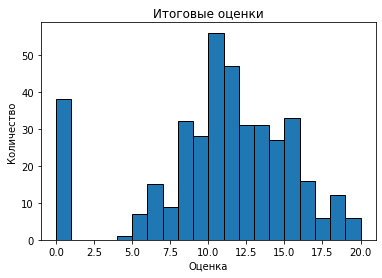

In [178]:
plt.hist(data['G3'], bins=20,edgecolor = 'k', range=[0,20])
plt.xlabel('Оценка'); plt.ylabel('Количество'); plt.title('Итоговые оценки');

За исключением большого числа студентов, получивших 0 баллов, распределение нормальное. Возможно 0 использовался для тех, кто не пришел на экзамен или вместо отсутсвия данных. Нужно проверить есть ли пропущенные переменные.

In [179]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [180]:
missing_values_table(data)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


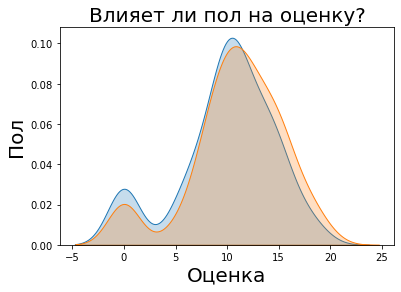

In [37]:
sns.kdeplot(data.loc[data['sex'] == 'F', 'G3'], label='Женский', shade = True)
sns.kdeplot(data.loc[data['sex'] == 'M', 'G3'], label='Мужской', shade = True)
plt.title('Влияет ли пол на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Пол', fontsize = 20)
plt.show()

Граф показывает, что нет сильных различий между оценками девушек и парней.

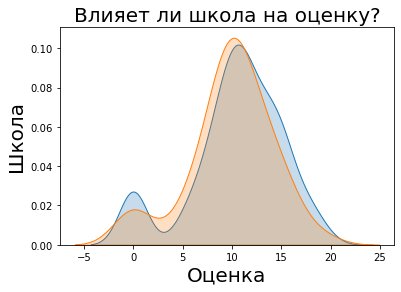

In [38]:
sns.kdeplot(data.loc[data['school'] == 'GP', 'G3'], label='Gabriel Pereira', shade = True)
sns.kdeplot(data.loc[data['school'] == 'MS', 'G3'], label='Mousinho', shade = True)
plt.title('Влияет ли школа на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Школа', fontsize = 20)
plt.show()

Школа тоже особо не влияет на оценку

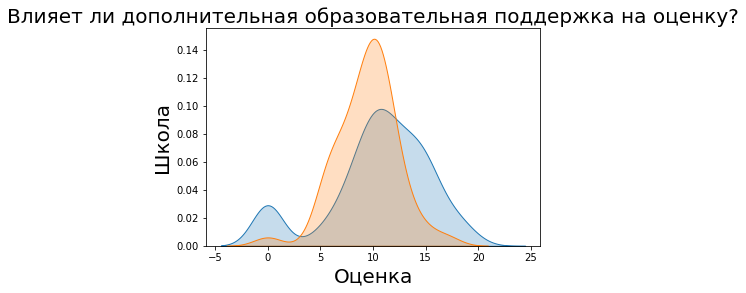

In [39]:
sns.kdeplot(data.loc[data['schoolsup'] == 'no', 'G3'], label='нет', shade = True)
sns.kdeplot(data.loc[data['schoolsup'] == 'yes', 'G3'], label='да', shade = True)
plt.title('Влияет ли дополнительная образовательная поддержка на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Школа', fontsize = 20)
plt.show()

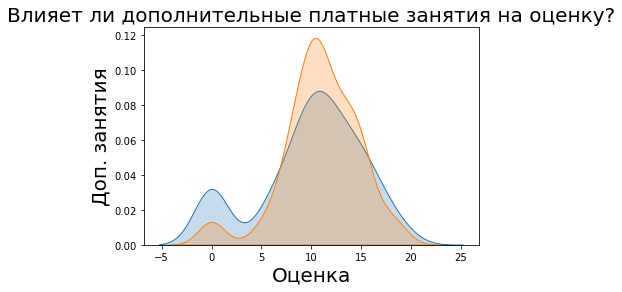

In [40]:
sns.kdeplot(data.loc[data['paid'] == 'no', 'G3'], label='нет', shade = True)
sns.kdeplot(data.loc[data['paid'] == 'yes', 'G3'], label='да', shade = True)
plt.title('Влияет ли дополнительные платные занятия на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Доп. занятия', fontsize = 20)
plt.show()

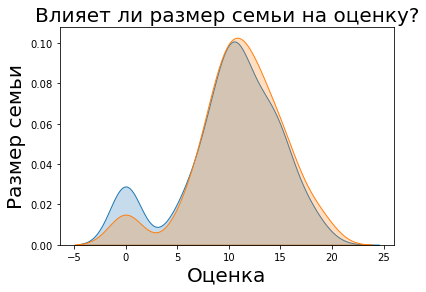

In [41]:
sns.kdeplot(data.loc[data['famsize'] == 'GT3', 'G3'], label='больше 3 человек', shade = True)
sns.kdeplot(data.loc[data['famsize'] == 'LE3', 'G3'], label='меньше или равно 3', shade = True)
plt.title('Влияет ли размер семьи на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Размер семьи', fontsize = 20)
plt.show()

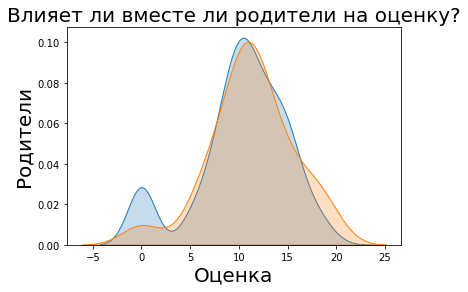

In [42]:
sns.kdeplot(data.loc[data['Pstatus'] == 'T', 'G3'], label='вместе', shade = True)
sns.kdeplot(data.loc[data['Pstatus'] == 'A', 'G3'], label='раздельно', shade = True)
plt.title('Влияет ли вместе ли родители на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Родители', fontsize = 20)
plt.show()

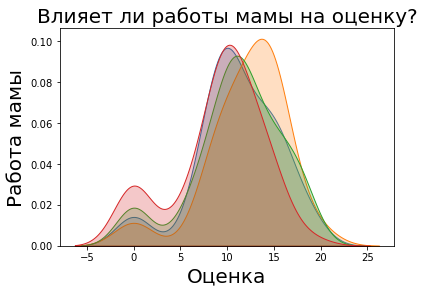

In [181]:
sns.kdeplot(data.loc[data['Mjob'] == 'teacher','G3'], label='преподавательская деятльность', shade = True)
sns.kdeplot(data.loc[data['Mjob'] == 'health','G3'], label='область здравоохранения', shade = True)
sns.kdeplot(data.loc[data['Mjob'] == 'services','G3'], label='сервисная работа', shade = True)
sns.kdeplot(data.loc[data['Mjob'] == 'at_home','G3'], label='дома', shade = True)
plt.title('Влияет ли работы мамы на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Работа мамы', fontsize = 20)
plt.show()

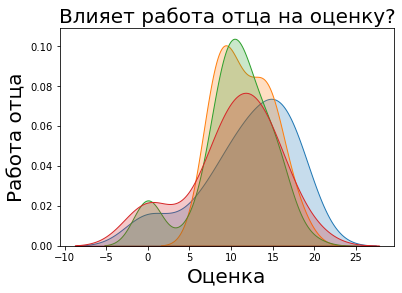

In [183]:
sns.kdeplot(data.loc[data['Fjob'] == 'teacher','G3'], label='преподавательская деятльность', shade = True)
sns.kdeplot(data.loc[data['Fjob'] == 'health','G3'], label='область здравоохранения', shade = True)
sns.kdeplot(data.loc[data['Fjob'] == 'services','G3'], label='сервисная работа', shade = True)
sns.kdeplot(data.loc[data['Fjob'] == 'at_home','G3'], label='дома', shade = True)
plt.title('Влияет работа отца на оценку?', fontsize = 20)
plt.xlabel('Оценка', fontsize = 20);
plt.ylabel('Работа отца', fontsize = 20)
plt.show()

### Корреляционная матрица

In [45]:
data_num = data[['age','Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'goout','Dalc', 'Walc', 'health', 'absences', "G1","G2", "G3"]]
data_num.corr()

,age,Medu,Fedu,traveltime,studytime,failures,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660
Walc,0.117276,-0.047123,-0.012631,0.134116,-0.253785,0.141962,0.420386,0.647544,1.000000,0.092476,0.136291,-0.126179,-0.084927,-0.051939
health,-0.062187,-0.046878,0.014742,0.007501,-0.075616,0.065827,-0.009577,0.077180,0.092476,1.000000,-0.029937,-0.073172,-0.097720,-0.061335


Представим корреляционную матрицу графически.

<AxesSubplot:>

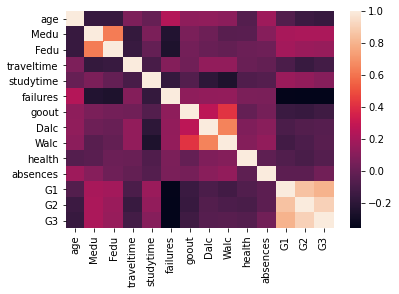

In [46]:
sns.heatmap(data_num.corr())

Видно, что наибольшую корреляцию итоговая оценка, помимо оценок за 1 и 2 периоды,имеет с образованием родителей и временем, потраченным на учебу, возрастом, временем на путешествия, уровень здоровья и тд. Для регрессии будем использовать данные, которые наиболее сильно коррелируют с G3

In [47]:
data_2 = data[["G1", "G2","G3","studytime", "Medu", "Fedu", "famrel", "absences", "age","traveltime","goout","Dalc","Walc", "health"]]
data_obj = data[["Mjob", "Fjob", "paid", "schoolsup"]]
predict = "G3"

In [134]:
features = data_2.copy()
categorical_subset = pd.get_dummies(data_obj)        
features = pd.concat([data_2, categorical_subset], axis = 1)

scaler = StandardScaler().fit(features)
features = pd.DataFrame(scaler.transform(features), columns=features.columns, index=features.index) 
features

,G1,G2,G3,studytime,Medu,Fedu,famrel,absences,age,traveltime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,paid_no,paid_yes,schoolsup_no,schoolsup_yes
0,-1.782467,-1.254791,-0.964934,-0.042286,1.143856,1.360371,0.062194,0.036424,1.023046,0.792251,...,-0.414858,-0.230940,-0.218507,-1.104129,-0.625176,3.552561,0.919671,-0.919671,-2.597133,2.597133
1,-1.782467,-1.520979,-0.964934,-0.042286,-1.600009,-1.399970,1.178860,-0.213796,0.238380,-0.643249,...,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,0.919671,-0.919671,0.385040,-0.385040
2,-1.179147,-0.722415,-0.090739,-0.042286,-1.600009,-1.399970,0.062194,0.536865,-1.330954,-0.643249,...,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-1.087346,1.087346,-2.597133,2.597133
3,1.234133,0.874715,1.002004,1.150779,1.143856,-0.479857,-1.054472,-0.464016,-1.330954,-0.643249,...,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,-1.087346,1.087346,0.385040,-0.385040
4,-1.480807,-0.190038,-0.090739,-0.042286,0.229234,0.440257,0.062194,-0.213796,-0.546287,-0.643249,...,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-1.087346,1.087346,0.385040,-0.385040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,-0.575827,-0.456226,-0.309288,-0.042286,-0.685387,-0.479857,1.178860,0.661975,2.592380,-0.643249,...,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,-1.087346,1.087346,0.385040,-0.385040
391,0.932473,1.407091,1.220553,-1.235351,0.229234,-1.399970,-2.171138,-0.338906,0.238380,0.792251,...,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,0.919671,-0.919671,0.385040,-0.385040
392,-0.274167,-0.722415,-0.746385,-1.235351,-1.600009,-1.399970,1.178860,-0.338906,3.377047,-0.643249,...,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,0.919671,-0.919671,0.385040,-0.385040
393,0.027493,0.342338,-0.090739,-1.235351,0.229234,-0.479857,0.062194,-0.714236,1.023046,2.227751,...,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,0.919671,-0.919671,0.385040,-0.385040


In [49]:
# features = data_2.copy()
# categorical_subset = data.select_dtypes('object')    
# categorical_subset = pd.get_dummies(categorical_subset)
# features = pd.concat([data_2, categorical_subset], axis = 1)

# scaler = StandardScaler().fit(features)
# features = pd.DataFrame(scaler.transform(features), columns=features.columns, index=features.index) 
# features

In [88]:
x = np.array(features.drop([predict], axis=1))
y = np.array(features[predict])

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 46)

10665
395


In [155]:
regressions = pd.DataFrame(columns = ["name",'func','MSE','r2'])
linear = LinearRegression()

linear.fit(X_train, Y_train)
predicted = linear.predict(X_test)
print ("MSE :", metrics.mean_squared_error(Y_test,predicted))
print("Правильность на обучающем наборе: {:.5f}".format(linear.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.5f}".format(linear.score(X_test, Y_test)))

MSE : 0.13348020180702463
Правильность на обучающем наборе: 0.82455
Правильность на тестовом наборе: 0.87875


In [68]:
def regression(name,func,regressions, i):
    func.fit(X_train, Y_train)
    predicted = func.predict(X_test)
    regressions.loc[i, 'name'] = name
    regressions.loc[i, 'func'] = func
    regressions.loc[i, 'MSE'] = metrics.mean_squared_error(Y_test,predicted)
    regressions.loc[i, 'r2'] = func.score(X_test, Y_test)

In [187]:
regression("Ridge",Ridge(),regressions,0)
regression("KNeighborsRegressor",KNeighborsRegressor(n_neighbors=10, weights="distance"),regressions,1)
regression("SGDRegressor", SGDRegressor(),regressions,2)
regression("GradientBoostingRegressor", GradientBoostingRegressor(random_state=0, n_estimators=150),regressions,3)
regression("RandomForestRegressor",RandomForestRegressor(random_state=0, n_estimators=50),regressions,4)
regression("DecisionTreeRegressor",DecisionTreeRegressor(random_state=0, criterion="mae", max_depth=4),regressions,5)
regression("LinearRegression",LinearRegression(),regressions,6)

best = regressions.sort_values(by='r2', ascending=False).head(7)
best.drop(columns=["func"])

,name,MSE,r2
4,RandomForestRegressor,0.114888,0.89564
6,LinearRegression,0.13348,0.878751
0,Ridge,0.134954,0.877412
2,SGDRegressor,0.135146,0.877238
3,GradientBoostingRegressor,0.160925,0.853821
5,DecisionTreeRegressor,0.166114,0.849108
1,KNeighborsRegressor,0.475271,0.568281


In [188]:
def check_regression_n_times(func, N):
    r2 = 0
    MSE = 0
    
    for i in range(N):
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 15+i)
        func.fit(X_train, Y_train)
        predicted = func.predict(X_test)
        MSE +=  metrics.mean_squared_error(Y_test,predicted)
        r2 += func.score(X_test, Y_test)
    
    best.loc[best['func'] == func, 'MSE'] = MSE/N
    best.loc[best['func'] == func, 'r2'] = r2/N

In [189]:
for func in best['func']:
    check_regression_n_times(func, 10)
best.drop(columns=["func"])

,name,MSE,r2
4,RandomForestRegressor,0.129783,0.87087
6,LinearRegression,0.180791,0.818698
0,Ridge,0.180993,0.81853
2,SGDRegressor,0.187969,0.81122
3,GradientBoostingRegressor,0.154543,0.845122
5,DecisionTreeRegressor,0.20626,0.792933
1,KNeighborsRegressor,0.530036,0.469126


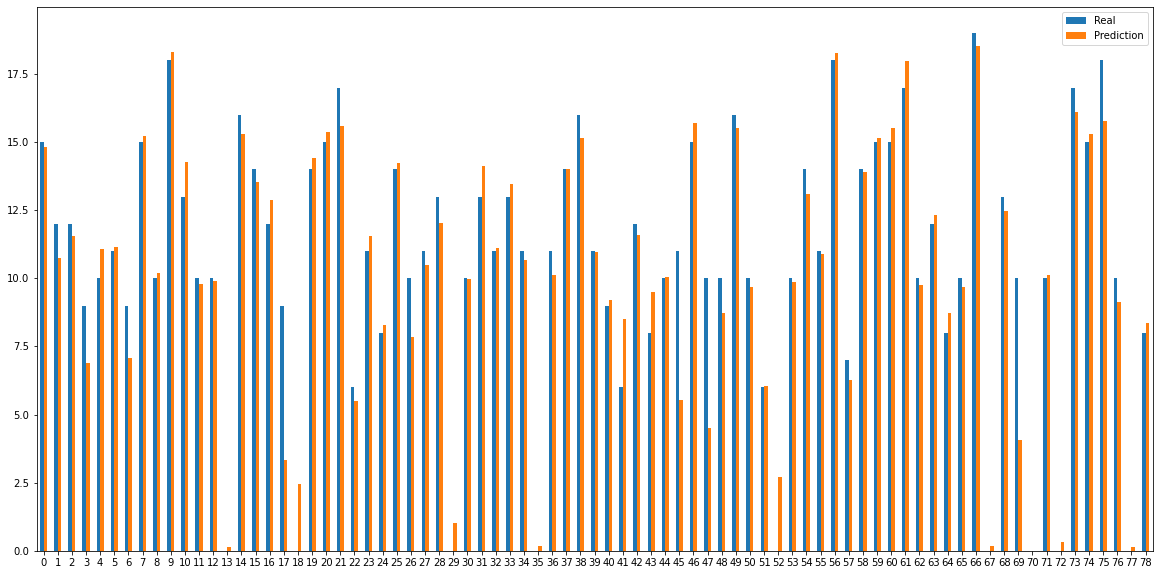

In [176]:
rfr = RandomForestRegressor(random_state=0, n_estimators=50)
rfr.fit(X_train, Y_train)
predicted = rfr.predict(X_test)
comparison = pd.DataFrame(columns=["Real","Prediction"])

f = features.drop([predict], axis=1)

tmp_df = pd.DataFrame(X_test, columns=f.columns)
tmp_df["G3"] = predicted
tmp_df = tmp_df.reindex(columns=features.columns)
tmp_df = pd.DataFrame(scaler.inverse_transform(tmp_df), columns=tmp_df.columns, index=tmp_df.index)
comparison["Prediction"] = tmp_df["G3"]


tmp_df = pd.DataFrame(X_test, columns=f.columns)
tmp_df["G3"] = Y_test
tmp_df = tmp_df.reindex(columns=features.columns)
tmp_df = pd.DataFrame(scaler.inverse_transform(tmp_df), columns=tmp_df.columns, index=tmp_df.index)
comparison["Real"] = tmp_df["G3"]

ax = comparison.plot.bar(rot=0, figsize=(20,10))